In [2]:
import pandas as pd
import helper_code.dataloading as dataloading
import helper_code.data_vis as data_vis
import helper_code.model_functions as model_functions
#Importing packages
import argparse
import os
from torch.utils.data import DataLoader
import torch
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm

from chromadb import PersistentClient as PersistentClient
from chromadb.errors import InternalError as CollectionError

d:\Projects\DSC180A-Capstone\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:


def sample_csv_rows(file_path, x):
    """
    Reads a CSV file and returns a random sample of x rows as a DataFrame.

    Args:
        file_path (str): The path to the input CSV file.
        x (int): The number of random rows to select.

    Returns:
        pd.DataFrame: A new DataFrame with the sampled rows.
    """
    # Read the entire CSV file into a DataFrame
    df = pd.read_csv(file_path)


    df['timestamp'] = df['image'].str.extract(r"https:\/\/tools\.alertcalifornia\.org\/fireframes5\/digitalpath-redis\/[^\/]+\/\d{4}\/\d{3}\/\d{2}\/(\d+)\.")
    df.sort_values(by='timestamp')

    # Check if the number of rows requested is more than available
    if len(df) < x:
        raise ValueError(f"The number of rows in the file ({len(df)}) is less than the requested sample size ({x}).")
    print(len(df))
    # Select rows
    n = len(df)

    nth = round(n / x)

    print(nth)

    sampled_rows = df.iloc[::nth]
    
    return sampled_rows

# --- Example Usage ---
# Replace 'your_file.csv' with the path to your actual file
# Replace '10' with the number of rows you want to sample
file_path = 'camera_data\coronado_hills_binary_10-24-2025.csv'
x_rows_to_sample = 1500

try:
    sample = sample_csv_rows(file_path, x_rows_to_sample)
    
    # Optional: Save the sample to a new CSV file
    sample.to_csv('coronado_hills_sampled.csv', index=False)

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except ValueError as e:
    print(f"Error: {e}")


7490
5


<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid escape sequence '\c'
C:\Users\Aneesh\AppData\Local\Temp\ipykernel_11876\275437125.py:37: SyntaxWarning: invalid escape sequence '\c'
  file_path = 'camera_data\coronado_hills_binary_10-24-2025.csv'


In [10]:
len(sample)

1498

In [ ]:
labels_csv = r"camera_data\palomar_observatory_1_data.csv"
image_dir = r"camera_data\images"

data = dataloading.get_data(labels_csv, image_dir, replace_images = False)

train, val, test = dataloading.get_train_val_test(data = data, output_csvs=True)

train_dataset, val_dataset, test_dataset = dataloading.get_datasets(train, val, test)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, pin_memory=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True, pin_memory=True)

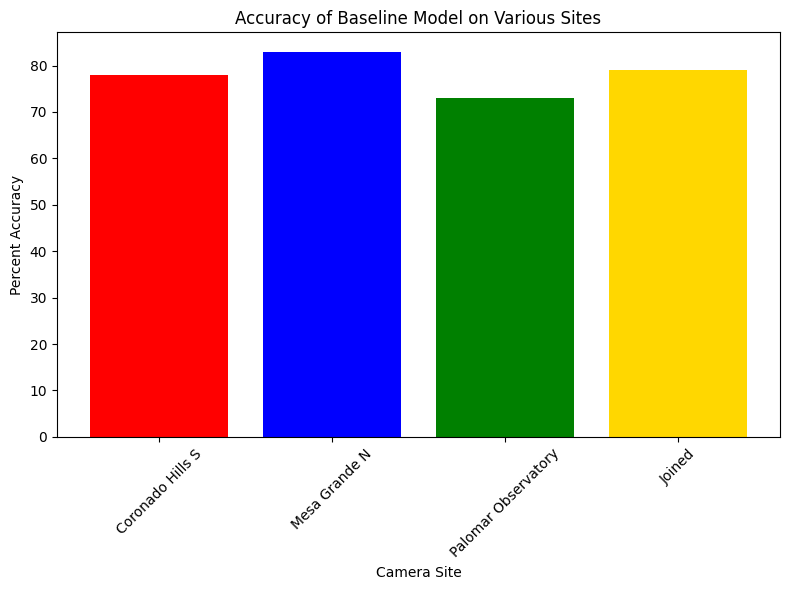

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define the data
data = {
    "Coronado Hills S": 78,
    "Mesa Grande N": 83,
    "Palomar Observatory": 73,
    "Joined": 79
}

# 2. Create the Pandas DataFrame
# Since this is a simple dictionary, we convert it to a DataFrame.
# We map the dictionary keys to an 'Index' or a specific column.
df = pd.DataFrame(list(data.items()), columns=['Location', 'Value'])

# 3. Create the Bar Graph
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
plt.bar(df['Location'], df['Value'], color = ["red", "blue", "green", "gold"])

# 4. Add labels and title
plt.xlabel('Camera Site')
plt.ylabel('Percent Accuracy')
plt.title('Accuracy of Baseline Model on Various Sites')

# Optional: Rotate x-axis labels if they overlap
plt.xticks(rotation=45)

# 5. Display the graph
plt.tight_layout() # Adjusts plot to ensure everything fits
plt.show()